# Explorando dados de mundo real do SUS 

O desafio objetiva revelar a autonomia em explorar bases de dados, identificar informações relevantes, organizar base do conhecimento e fazer previsões inteligentes que extrapolem o conteúdo imediato da base para além de seu propósito imediato.

# Desafio: Avaliação da oncologia do SUS - Ementa

## Introdução

O SUS mantém registros de tratamentos oncológicos via Sistema de Informação Ambulatorial (SIA). Os dados do SIA são disseminados como dados abertos via estratégia tabnet e tabwin. Com os dados disponibilizados via tabwin é possível monitorar o itinerário terapêutico do usuário do SUS a partir dos dados administrativos empregando métodos de coortes.

## Objetivo

Caracterizar quais usuários retornarão ao SUS após 6 meses para a mesma condição de saúde por meio das bases de dados administrativas abertas.

## Método 

A partir do conjunto de dados fornecido para o exercício, o qual sintetiza em cada tupla o tratamento de um usuário, avaliar a relação das variáveis sociodemográficas e clínicas com o registro do atendimento ao usuário do SUS na base de dados após seis meses do registro administrativo anterior. Devem ser utilizados métodos supervisionados de aprendizado de máquina. Realizar o treino removendo usuários tratados durante os seis primeiros meses de observação e nos últimos doze meses de observervação, ambos a partir do mês do primeiro tratamento. Utilizar como teste os usuários registrados nos últimos doze meses observados, porém sem registro de intervalo de seis meses de tratamento (retorno à base administrativa).

## Resultados esperados

- Compreender os dados e metadados fornecidos na disseminação de dados abertos.
- Demonstrar a modelagem (tratamento dos dados), contemplando:
    - Separação em treino e teste, eventuais amostragens.
    - Enriquecimento com taxonomias quando existente (por exemplo, município, região de saúde, estado, região do país; ou comorbidade e respectivo capítulo da CID.
    - Tratamento de variáveis contínuas (discretização, normalização, etc).
    - Transposição de variáveis em binárias ou numéricas.
- Demonstar com métricas de avaliação a assertividade dos modelos adotados.
    - Mostrar a técnica de validação.
    - Mostrar métricas correlatas à matriz de confusão.
- Caracterizar o modelo preditivo
    - Sugerir variáveis a serem adotadas e atentadas no ato da coleta pelo profissional da saúde.
    - Sugirir variáveis a serem descartadas ou colocadas como facultativas para a condição de saúde numa eventual atualização do modelo de informação.
    - Elencar ou ranquear os usuários que devem ser clinicamente monitorados para evitar atendimento após seis meses do último tratamento.

## Fontes

- Sistema de Informação Ambulatorial. Disponível em ftp://ftp.datasus.gov.br/dissemin/publicos/SIASUS/200801_/Dados/
- Procedimentos mantidos via Sistema de Gerenciamento da Tabela de Procedimentos, Medicamentos e OPM do SUS (SIGTAP).
- Diagnóstico segundo a Classificação Internacional de Doenças (CID10).
- Protocolos Clínicos e Diretrizes Terapêuticas (PCDT) mantidos pelo Ministério da Saúde.
- Municípios segundo codificação mantida pelo Instituto Brasileiro de Geografia e Estatistica (IBGE)

# Caracterização dos dados abertos oncológicos do SUS


## Navegando nos dados do SUS via FTP

Os dados oncológicos do SUS são disseminados via protocolo de transferência de arquivos (FTP).
Em seu navegador de arquivos é possível acessar manualmente o diretório  ftp://ftp.datasus.gov.br/dissemin/publicos/.

<blockquote> <b>Atenção!</b> Embora o endereço <u>ftp:://</u> pareça uma URL os navegadores descontinuaram o serviço de navegação em arquivos, logo, possivelmente não conseguirá acessar o endereço com um clique. Use seu <i>navegador de arquivos</i> ao invés do navegador web.</blockquote>


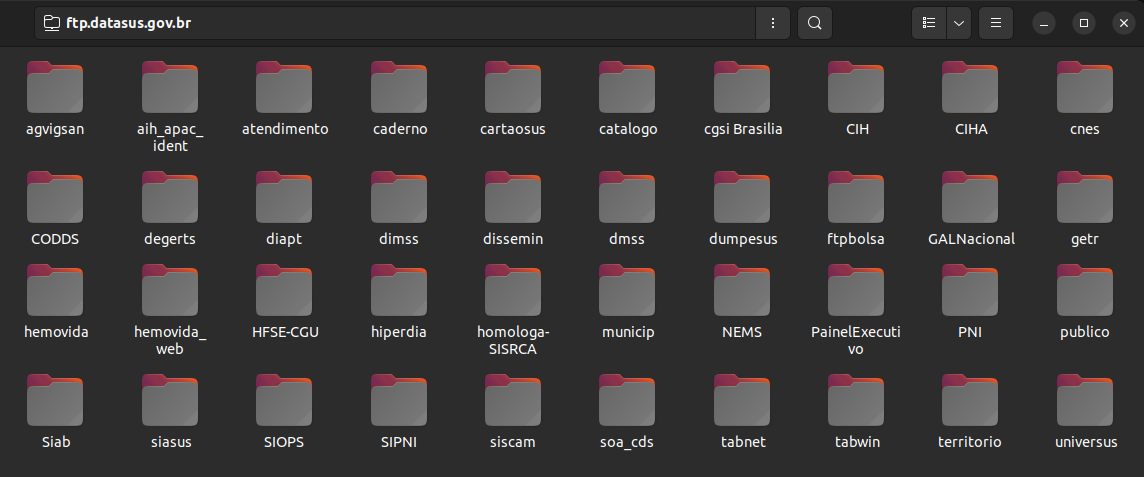

Ao acessar as pastas você verá que apenas a __dissemin/publicos__ é disponível sem usuário e senha.





In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/labxss/curso_python/main/aux/ftp_sintese.csv'
df = pd.read_csv(url, index_col=0, encoding="UTF8")
registro = '{:,}'.format(df['registros'].sum()).replace(',','.')
byte = '{:,}'.format(df['bytes'].sum()).replace(',','.')
arquivo = '{:,}'.format(df['arquivos'].sum()).replace(',','.')

from IPython.display import Markdown as md


md(f"O SUS disseminou <b>{registro}</b> registros até abril de 2023 em {arquivo} arquivos com 2.852 variáveis com nomes distintos, totalizando {byte} bytes compactados.")


O SUS disseminou <b>22.679.806.035</b> registros até abril de 2023 em 176.661 arquivos com 2.852 variáveis com nomes distintos, totalizando 617.859.960.786 bytes compactados.

A tabela que caracteriza o conteúdo do FTP está disponível em https://github.com/labxss/curso_python/blob/main/aux/ftp_sintese.csv. Veja uma amostra:

In [ ]:
display(df)

,subsistema,inicio,fim,arquivos,bytes,registros,no_sistema,no_subsistema,no_mantenedor
sistema,,,,,,,,,
CIH,CR,200801,201104,868,165114178,7676888,Comunicação de Internação Hospitalar,Sistema de Comunicação de Informação Hospitalar,SAES/MS
CIHA,CIHA,201101,202302,3727,3025767940,209777814,Comunicação de Informação Hospitalar e Ambulat...,Sistema de Comunicação de Informação Hospitala...,SAES/MS
CMD,CT,201701,201904,756,16141452019,1166063520,NaN,Contatos Assistenciais,NaN
CMD,PR,201701,201904,753,19039211283,1254028326,NaN,Procedimentos Realizados,NaN
CNES,DC,200508,202302,5776,117816811,2630639,Cadastro Nacional de Estabelecimentos de Saúde,Dados Complementares,SAES/MS
...,...,...,...,...,...,...,...,...,...
SINAN,VIOL,200912,201912,11,168873447,2299552,Sistema de Informação de Agravos de Notificação,Violência Interpessoal ou Autoprovocada,SVS/MS
SINAN,ZIKA,201612,202012,5,6296071,386099,Sistema de Informação de Agravos de Notificação,NaN,SVS/MS
SINASC,DN,201996,202020,679,3480922782,86176341,Sistema de Informações sobre Nascidos Vivos,Declaraçõe de Nascidos Vivos,SVS/MS


Os registros oncológicos são enviados mensalmente ao Ministério da Saúde pelos __gestores estaduais e municipais com administração plena__ via Sistema de Informação Ambulatorial (SIA).

Note na tabela a seguir que os laudos de Quimioterapia e Radioterapia são, respectivamente, dos subsistemas __AQ__ e __AR__.


In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/labxss/curso_python/main/aux/ftp_sintese.csv'
df = pd.read_csv(url, index_col=0, encoding="UTF8")
df_sia=df.query('sistema == "SIA"')
display(df_sia)

registro_sia = '{:,}'.format(df_sia['registros'].sum()).replace(',','.')
byte_sia = '{:,}'.format(df_sia['bytes'].sum()).replace(',','.')
arquivo_sia = '{:,}'.format(df_sia['arquivos'].sum()).replace(',','.')

from IPython.display import Markdown as md

md(f"Observe que o SUS disseminou <b>{registro_sia}</b> registros ambulatoriais até abril de 2023 em {arquivo_sia} arquivos, totalizando {byte_sia} bytes compactados.")

df_aq=df.query('subsistema == "AQ"')
registro_aq = '{:,}'.format(df_aq['registros'].sum()).replace(',','.')
byte_aq = '{:,}'.format(df_aq['bytes'].sum()).replace(',','.')
arquivo_aq = '{:,}'.format(df_aq['arquivos'].sum()).replace(',','.')

df_ar=df.query('subsistema == "AR"')
registro_ar = '{:,}'.format(df_ar['registros'].sum()).replace(',','.')
byte_ar = '{:,}'.format(df_ar['bytes'].sum()).replace(',','.')
arquivo_ar = '{:,}'.format(df_ar['arquivos'].sum()).replace(',','.')


md(f"Observe que o SUS disseminou <b>{registro_aq}</b> registros de quimioterapia até abril de 2023 em {arquivo_aq} arquivos, totalizando {byte_aq} bytes compactados. Quando a radiologia o SUS disseminou <b>{registro_ar}</b> registros até abril de 2023 em {arquivo_ar} arquivos, totalizando {byte_ar} bytes compactados.")

,subsistema,inicio,fim,arquivos,bytes,registros,no_sistema,no_subsistema,no_mantenedor
sistema,,,,,,,,,
SIA,AM,200801,202302,4862,12512566209,262767281,Sistema de Informações Ambulatoriais do SUS a ...,Laudo de Medicamentos,SAES/MS
SIA,AMP,201603,202302,435,2957568,38514,Sistema de Informações Ambulatoriais do SUS a ...,Laudo de Acompanhamento Multiprofissional,SAES/MS
SIA,AN,200801,201410,2145,458824790,6534272,Sistema de Informações Ambulatoriais do SUS a ...,Laudo de Nefrologia,SAES/MS
SIA,AQ,200801,202302,4877,3688343798,45896591,Sistema de Informações Ambulatoriais do SUS a ...,Laudo de Quimioterapia,SAES/MS
SIA,AR,200801,202302,4434,308009185,3486944,Sistema de Informações Ambulatoriais do SUS a ...,Laudo de Radioterapia,SAES/MS
SIA,ATD,201408,202302,2776,718396136,11140633,Sistema de Informações Ambulatoriais do SUS a ...,Laudo de Tratamento Dialítico,SAES/MS
SIA,BI,200801,202302,4914,90729235469,2159925063,Sistema de Informações Ambulatoriais do SUS a ...,Boletim Individual,SAES/MS
SIA,PA,199407,202302,9493,131035177511,5089453524,Sistema de Informações Ambulatoriais do SUS a ...,Produção Ambulatorial,SAES/MS
SIA,PA,199407,202302,9493,131035177511,5089453524,Sistema de Informações Ambulatoriais do SUS a ...,Produção Ambulatorial,SAES/MS


Observe que o SUS disseminou <b>45.896.591</b> registros de quimioterapia até abril de 2023 em 4.877 arquivos, totalizando 3.688.343.798 bytes compactados. Quando a radiologia o SUS disseminou <b>3.486.944</b> registros até abril de 2023 em 4.434 arquivos, totalizando 308.009.185 bytes compactados.

## Arquivos DBF de oncologia

Vamos conhecer, a título de ilustração, o arquivo _database file_ __AQAL2103.dbf__. No ftp do datasus os nomes dos arquivos de dados são estruturados da seguinte forma:

- Sigla do subsistema (normalmente com dois a três dígitos). Exemplo:, AQ para quimioterapia.
- Sigla da Unidade da Federação (dois dígitos). Exemplo: AL para Alagoas.
- Ano (dois dígitos). Exemplo: 21 para 2021.
- Mês (dois dígitos). Exemplo: 03 para março.

<blockquote> <b>Informação:</b> O dicionário das variáveis está disponível em ftp://ftp.datasus.gov.br/dissemin/publicos/SIASUS/200801_/Doc/.  </blockquote>


Veja a seguir uma parte do arquivo original AQAL2103.dbc:

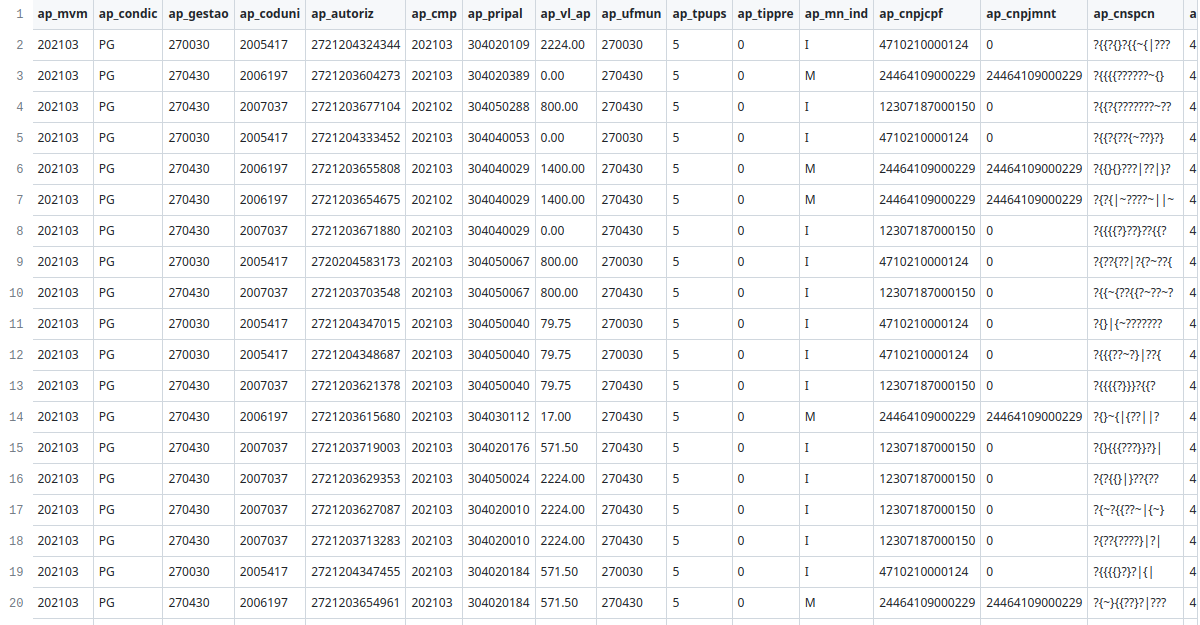

Os tratamentos registrados no SIA decorrem a partir dos seguintes instrumentos (fichas de cadastro manual ou informatizadas):

- APAC: Autorização de Procedimentos Ambulatoriais de Alta Complexidade
- BPA-C: Boletim de Produção Ambulatorial Consolidado
- **BPA-I: Boletim de Produção Ambulatorial Individualizado**
- RAAS-AD: Registro das Ações Ambulatoriais de Saúde - Atenção Domiciliar
- RAAS-PSI: Registro das Ações Ambulatoriais de Saúde - Atenção Psicossocial

O arquivo principal da APAC possui o prefixo __PA__.  Os dados abertos individualizados do SIA apresentam o CNS criptografado, o que permite acompanhar o itinerário terapêutico do usuário do SUS.

Os procedimentos são regulados via Sistema de Gerenciamento da Tabela de Procedimentos, Medicamentos e OPM do SUS (__SIGTAP__, também conhecida como _tabela SUS_). Muitos procedimentos obrigam a indentificação do usuário do SUS com o Cartão Nacional de Saúde (CNS), hoje plenamente integrado ao CPF. Cada atendimento e procedimento corresponde a um linha do banco, cujas variáveis são exemplificadas a seguir:

- Mes de referência do atendimento de dado procedimento.
- A quantidade aprovada de cada procedimento.
- O valor aprovado, se o pagamento for lastreado na tabela do SUS.
- Município de residência.
- Sexo.
- Idade no mês do atendimento.
- Estabelecimento segundo o Cadastro Nacional de Estabelecimentos de Saúde (CNES).


Abaixo está um exemplo do arquivo **AQ** com todas as variáveis.

In [ ]:
import pandas as pd

diretriz = pd.read_csv("https://raw.githubusercontent.com/labxss/curso_python/main/data/AQAL2103.dbc.200.csv", index_col=0, encoding="UTF8")
display(diretriz)

,ap_condic,ap_gestao,ap_coduni,ap_autoriz,ap_cmp,ap_pripal,ap_vl_ap,ap_ufmun,ap_tpups,ap_tippre,...,aq_dtini2,aq_cidini3,aq_dtini3,aq_conttr,aq_dtintr,aq_esqu_p1,aq_totmpl,aq_totmau,aq_esqu_p2,ap_natjur
ap_mvm,,,,,,,,,,,,,,,,,,,,,
202103,PG,270030,2005417,2721204324344,202103,304020109,2224.00,270030,5,0,...,20200618.0,C20,20200721.0,N,20210126,5FU+L,12,3,V,2062
202103,PG,270430,2006197,2721203604273,202103,304020389,0.00,270430,5,0,...,NaN,NaN,NaN,S,20210105,XELOD,6,0,A,1104
202103,PG,270430,2007037,2721203677104,202102,304050288,800.00,270430,5,0,...,NaN,NaN,NaN,S,20210212,HERCE,6,0,"PTIN, PACL",3999
202103,PG,270030,2005417,2721204333452,202103,304040053,0.00,270030,5,0,...,NaN,NaN,NaN,N,20210208,CDDP+,3,3,5FU,2062
202103,PG,270430,2006197,2721203655808,202103,304040029,1400.00,270430,5,0,...,NaN,NaN,NaN,S,20210226,AC-T,6,0,NaN,1104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202103,PG,270430,2007037,2721203718684,202103,304020079,301.50,270430,5,0,...,20170918.0,NaN,NaN,N,20190617,BICAL,36,21,",ELIG45MG",3999
202103,PG,270430,2007037,2721203703560,202103,304020079,301.50,270430,5,0,...,NaN,NaN,NaN,N,20210310,ELIGA,12,0,RD 45MG,3999
202103,PG,270430,2007037,2721203703670,202103,304060224,800.00,270430,5,0,...,NaN,NaN,NaN,N,20210309,GRANU,6,0,"L,R-CHOP",3999


Note na lista abaixo que existe uma quantidade expressiva de variáveis. Ao abrir cada tipo de origem observe que nem todas são disponibilizadas nos arquivos de disseminação.

- SIASUS	AM	51
- SIASUS	AMP	65
- SIASUS	AN	61
- SIASUS	AQ	64
- SIASUS	AR	74
- SIASUS	ATD	65
- SIASUS	BI	36
- SIASUS	PA	73
- SIASUS	PS	45


<blockquote>
<hr>
<b>Exercício:</b> 

Explore os arquivos <i>PAAL2103</i> e <i>AQAL2103</i>. 

Você pode utilizar a biblioteca <i>PySUS</i> ou baixar os arquivos
<ul>
  <li><b>PA</b> disponivel em <a href="https://github.com/labxss/curso_python/blob/main/data/PAAL2103.dbc.csv.gz">https://github.com/labxss/curso_python/blob/main/data/PAAL2103.dbc.csv.gz</a>.</li>
  <li><b>AQ</b> disponivel em <a href="https://github.com/labxss/curso_python/blob/main/data/AQAL2103.dbc.csv.gz">https://github.com/labxss/curso_python/blob/main/data/AQAL2103.dbc.csv.gz</a>.</li>
</ul>

Use o dicionário disponível no FTP para compreender as variáveis. 

Enumere as variáveis de cada arquivo. Demonstre variáveis são comuns entre ambos, quais são preenchidas e quais podem ser completadas com o cruzamento de ambos os arquivos.

Enumere variáveis cujo significado não foi intuitivo de compreender apenas pelo nome ou pela descrição, porém, tente deduzir o significado. Faça um primeiro juízo acerca da variável quanto à relavância por meio da distribuição de frequência.
<hr>
</blockquote>

## Itinerário terapêutico segundo diretriz clínica

Boa parte do arcabouço de regulação mantido via SIGTAP advém de disposições encaminhadas pela **Comissão Nacional de Incorporação de Tecnologias no SUS (Conitec)**, sobretudo de linhas terapêuticas de elevado custo.

No ato da incorporação de dada tecnologia de saúde no SUS, cujo atendimento deve ser regulado, é definido o respectivo protocolo ou diretriz. A lista de **Protocolos Clínicos e Diretrizes Terapêuticas** (PCDT) está disponível em https://www.gov.br/conitec/pt-br/assuntos/avaliacao-de-tecnologias-em-saude/protocolos-clinicos-e-diretrizes-terapeuticas.


126 instrumentos clínicos estão anotados segundo a doença (CID-10), disponíveis em https://github.com/labxss/curso_python/blob/main/aux/td_diretriz_cnv.csv. Essa tabela é mantida pela equipe da Sala Aberta de Inteligência em Saúde em https://sabeis-ats.shinyapps.io/painel/ > tabulador > doença > tabela de diretrizes.

In [ ]:
import pandas as pd

diretriz = pd.read_csv("https://raw.githubusercontent.com/labxss/curso_python/main/aux/td_diretriz_cnv.csv", index_col=0, encoding="UTF8")
display(diretriz)

,no_diretriz,co_cid
nu_diretriz,,
1,Acidente Vascular Cerebral Isquêmico Agudo,"I630,I631,I632,I633,I634,I635,I636,I638,I639,I..."
2,Acne grave,"L700,L701,L708"
3,Acromegalia,E220
6,Anemia por Deficiência de Ferro,"D500,D508"
7,Angioedema,D841
...,...,...
25,Deficiência Intelectual,"F78 ,F780,F781,F788,F789"
23,Câncer de Cabeça e Pescoço,"C00 ,C01 ,C02 ,C03 ,C04 ,C05 ,C06 ,C09 ,C10 ,C..."
88,Leucemia Linfoblástica Aguda Crom. Philad.,"C835,C910"


Por exemplo, a doença Mesotelioma Maligno de Pleura apresenta dois códigos CID-10:

- C45.0 Mesotelioma da pleura
- C45.9 Mesotelioma, não especificado

A diretriz de uso está disponível em https://www.gov.br/conitec/pt-br/midias/relatorios/portaria/2020/20201211_portaria_conjunta_diretrizes_mesotelioma_pleural.pdf.

Os procedimentos previstos e códigos SIGTAP para a doença são:

- Radiografia de tórax (PA) 02.04.03.017-0;
- Radiografia de torax (PA e Perfil) 02.04.03.015-3;
- Tomografia computadorizada de tórax 02.06.02.003-1;
- Exame de citologia (exceto cervico-vaginal e de mama) 02.03.01.003-5;
- Biopsia de pleura (por aspiração/agulha/pleuroscopia) 02.01.01.040-2;
- Biopsia percutânea orientada por tomografia computadorizada/ultrassonografia/
- Ressonância magnética/raio x 02.01.01.054-2;
- Videotoracoscopia 02.09.04.005-0;
- Exame anatomo-patológico para congelamento/parafina por peça cirúrgica ou por biópsia (exceto colo uterino e mama) 02.03.02.003-0 e
- Imunohistoquimica de neoplasias malignas (por marcador) 02.03.02.004-9

Os procedimentos acima não foram listados a partir do SIA, mas oferecidos no resumo https://www.gov.br/conitec/pt-br/midias/protocolos/resumidos/20210716_diretrizes-brasileiras-para-diagnstico-do-mesotelioma-maligno-de-pleura_resumido.pdf.

Note abaixo as variáveis _nu_cnpscn_, com o identificador criptografado do usuário do SUS e _co_procedimento_ com o procedimento SIGTAP sem o zero à esquerda. Consulte mais detalhes sobre o procedimento em http://sigtap.datasus.gov.br/ > Acessar a Tabela Unificada > cole o código iniciando com o dígito 0 > clique na lupa.

<blockquote>
<hr>
<b>Exercício:</b> 

Utilizando os arquivos <i>PAAL2103</i> e <i>AQAL2103</i>
identifique quais procedimentos são mais relevantes no arquivo <b>PA</b> e no arquivo <b>AQ</b> e para quais doenças. 

Identifique quais procedimentos foram mais relevantes para <b>câncer do pulmão</b>, qual foi a quantidade aprovada de cada proecedimento e o respectivo número de usuários do SUS.

Dica: Use o dicionário do FTP para identicar a variável de procedimento e a de diagnóstico.

<hr>
</blockquote>

## Dados nacionais consolidados

A tabela a seguir corresponde ao total de tratamentos registrados no __SIA PA__ para mesotelioma, enriquecidos com os demais arquivos do SIA a partir do mês do arquivo, código da gestão e número da APAC, disponível em https://raw.githubusercontent.com/labxss/curso_python/main/data/tf_mesotelioma.csv.

Note que os registros estão individualizados pelo usuário do SUS a partir da variável **nu_cnspcn**.

In [ ]:
import pandas as pd

mesotelioma = pd.read_csv("https://raw.githubusercontent.com/labxss/curso_python/main/data/tf_mesotelioma.csv", index_col=0, encoding="UTF8")
display(mesotelioma)

,nu_idade,co_gestao,co_ibge_municipio_evento,co_ibge_municipio_residencia,nu_competencia,qt_aprovada,co_cnes_estabelecimento,co_procedimento,nu_apac,nu_cnspcn,sg_sexo,pa_condic,co_cidpri,ds_nascimento,dt_evento,ds_esquema_1,ds_esquema_2,no_origem
vl_aprovado,,,,,,,,,,,,,,,,,,
97.44,13,120000,120020,120020,200805,1,5336171,206010079,NaN,1.510021e+14,M,EP,C459,19941106,200805.0,NaN,NaN,siasus_bi_ac.biac0805
363.00,6,120000,120040,120035,201401,2,5786592,803010141,0000000000016,1.510040e+14,F,EP,C452,20130630,201401.0,NaN,NaN,siasus_bi_ac.biac1401
12.70,50,120000,120040,120040,201609,2,2001586,302020012,NaN,1.510096e+14,M,EP,C459,19660317,201609.0,NaN,NaN,siasus_bi_ac.biac1609
138.63,50,270430,270430,270430,200804,1,2003333,206030010,NaN,2.485444e+14,F,PG,C450,19570618,200804.0,NaN,NaN,siasus_bi_al.bial0804
138.63,50,270430,270430,270430,200804,1,2003333,206030037,NaN,2.485444e+14,F,PG,C450,19570618,200804.0,NaN,NaN,siasus_bi_al.bial0804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42.10,89,170000,170210,170770,200805,1,2600536,304030031,1708200119439,1.024848e+14,F,EP,C450,NaN,NaN,HYDRE,A,siasus_pa_to.pato0805
97.44,39,170000,170210,172120,201010,1,2600536,206010079,NaN,NaN,M,EP,C450,NaN,NaN,NaN,NaN,siasus_pa_to.pato1010
138.63,55,170000,172100,171320,201711,1,2786117,206030010,NaN,NaN,F,EP,C459,NaN,NaN,NaN,NaN,siasus_pa_to.pato1711


<blockquote>
<hr>
<b>Exercício:</b> 

Identifique no arquivo <b>tf_cancer_pulmao.2021.csv.gz</b>, disponível no <a href="https://github.com/labxss/curso_python/tree/main/data">diretório do github</a>, quais procedimentos foram mais relevantes para <b>câncer do pulmão</b> no Brasil em 2021, qual foi a quantidade aprovada de cada procedimento e o respectivo número de usuários do SUS. Quando iniciou o registro da doença no SIA? O quadro nacional no período se mostrou diferente do quadro de Alagoas, em março de 2021, para a doença? 

Observe que as variáveis não estão com os nomes originais dos arquivos disseminados via estratégia <i>tabwin</i>. Enumere as variáveis cujo significado não foi intuitivo de compreender apenas pelo nome, porém, tente deduzir o significado.

<b>Dica:</b> Os prefixos e padrões de nomenclatura estão disponíveis na <a href="https://datasus.saude.gov.br/metodologia-de-administracao-de-dados-mad/">Metodologia de Administração de Dados - MAD</a> do DataSUS em <a href="https://ced.saude.gov.br/arquivo/download?path=%2Fuploads%2F&file=daaed-mad-objetosbd-v2-3-20180815140520.pdf">em padronização dos nomes de objetos de banco de dados </a>.

<hr>
</blockquote>

## Itinerário terapêutico do usuário do SUS

Cada usuário do SUS apresenta um itinerário terapêutico. Infelizmente não temos disponível o [sumário de alta](https://www.gov.br/saude/pt-br/acesso-a-informacao/participacao-social/consultas-publicas/2017/arquivos/SumarioAltaConsultaPublica.pdf) para sabermos concretamente qual foi o desfecho de cada intervenção.

Entretanto, a partir dos dados administrativos, podemos determinar a qualidade das ações e serviços de saúde com eventos e características enquanto condições clínicas ou sociais:

- Eventos ou características correlacionávels com desfechos clínicos:
  - ordem de precedência da linha terapêutica preconizada;
  - tempo de tratamento até descontinuação ou troca;
  - quantidade utilizada ou aplicada no período de cada procedimento;
  - sexo, idade e índice de massa corpórea
- Eventos ou características que podem estar relacionados ao desfecho clínico de forma indireta ou são explicáveis enquanto determinantes sociais das doenças:
  - funcionamento das regiões de saúde avaliando-se o local de atendimento _versus_ local de residência;
  - mudança do estabelecimento de atendimento e
  - _proxy_ de acesso mediante características sociodemográficas, como porte populacional, densidade demográfica, Índice de Desenvolvimento Humano (IDH), atividades econômicas do território segundo a Relação Anual de Informações Sociais (RAIS) do Ministério do Trabalho e Emprego e características dos estabelecimentos no território segundo o Cadastro Nacional de Estabelecimentos de Saúde (CNES), tais como número de leitos, equipamentos, profissionais, especialistas, etc.


Observe a seguir a síntes do itinerário terapêutico de cada usuário do SUS, disponível em https://github.com/labxss/curso_python/blob/main/data/vw_siasus_pa_024_usuario_sintese.csv.gz.

<blockquote>
<hr>
<b>Exercício:</b> 

Escolha três usuários com mais de cinco registros, segundo a variável <b>qt_registro</b> da tabela <b>vw_siasus_pa_024_usuario_sintese.csv.gz</b> e caracterize os atendimentos realizados a partir da tabela <b>tf_cancer_pulmao.csv</b>.

Deduza inicialmente o teor das variáveis da tabela <b>vw_siasus_pa_024_usuario_sintese.csv.gz</b>. Não se preocupe, mais tarde vamos entendê-la melhor.

<hr>
</blockquote>


In [ ]:
import pandas as pd

mesotelioma = pd.read_csv("https://raw.githubusercontent.com/labxss/curso_python/main/data/vw_siasus_pa_097_usuario_sintese.csv", index_col=0, encoding="UTF8")
display(mesotelioma)

,qt_registro,sexo_f,idade_min,idade_max,co_mes_min,co_mes_max,co_seq_diretriz,co_seq_cidpri,co_seq_procedimento,co_seq_gestao,...,co_mes_max_total,co_seq_diretriz_total,co_seq_cidpri_total,co_seq_procedimento_total,co_seq_gestao_total,co_cnes_estabelecimento_total,co_seq_municipio_residencia_total,vl_aprovado_total,qt_esquema1_total,qt_esquema2_total
usuariosus,,,,,,,,,,,,,,,,,,,,,
102484822429243,1,1,89,89,1305,1305,97,1138,1804,27,...,1357,"0, 97","1138, 1740",1804,27,2600536,5509,444.70,"HIDRE, HYDRE","A, IA"
102484849126258,1,0,51,51,1308,1308,97,1138,1805,26,...,1441,"0, 97","1138, 1740",1805,26,2077396,5369,155440.50,"HYDR, HYDRE","A, A;, EA"
151000091184210,4,4,68,68,1305,1309,97,1138,1804,26,...,1383,"0, 97","1138, 1740, 1751",1804,26,2077396,5094,8018.30,"HYDR, HYDRE","A, A;, EA"
151000216641189,3,0,58,59,1305,1309,97,1138,1805,5300,...,1459,"0, 97","1138, 1740","1804, 1805",5300,2080400,5300,157240.50,"HHYDR, HYDRE","A, EA"
151000230542696,5,5,63,63,1353,1353,97,1142,"1706, 1713, 1716, 1727, 1728",5370,...,1353,"24, 97","1086, 1087, 1142","1706, 1713, 1716, 1727, 1728, 1778, 1836","5090, 5370","2085194, 9369",5090,20341.60,"CISPL, ETOPO, G+CIS, GENZA","ATINA, ATINA+OLIN, PLATINA, R+CISPLATI, SIDE+C..."
151000241524863,6,0,80,80,1374,1375,97,1138,"1706, 1713, 1716, 1726",4849,...,1375,97,1138,"1706, 1713, 1716, 1726",4849,2082527,5073,485.00,NaN,NaN
151000460411423,6,6,36,36,1372,1373,97,1138,"1706, 1713, 1716, 1726",4849,...,1373,"96, 97","1116, 1138","1706, 1713, 1716, 1726, 1780",4849,2082527,4849,7325.00,CDDP/,"DACAR/CA, DACAR/CARM, DACAR/CRM"
151000809988405,4,0,0,0,1388,1388,97,1138,"1706, 1716, 1727, 1728",16,...,1388,"24, 47, 97","1087, 1138, 8182","1706, 1716, 1726, 1727, 1728, 1778, 4441",16,"1023, 396, 582, 6471188","2842, 2943",10868.00,"CARB+, CDDP, CDDP+, TAXO+","CARB, ETO, GEMZ, TAXO"
151000899392058,2,0,47,47,1306,1306,97,1138,"1707, 1718",7,...,1306,97,1138,"1707, 1718",7,10456,5630,1753.00,NaN,NaN


# Modelos preditivos para desfecho de tratamentos oncológicos - análise exploratória



No SIA, entre 2008 e abril/2023, foram identificados tratamentos oncológicos do SUS para vinte doenças com PCDT.


In [ ]:
import pandas as pd

url='https://raw.githubusercontent.com/labxss/curso_python/main/aux/vw_siasus_pa_diretriz_sintese.csv'
onco = pd.read_csv(url, index_col=0, encoding="UTF8")
onco=onco[onco['co_cid'].str.contains('C', na = False)].sort_values(by=['usuários'], ascending=False)
cols = ['usuários','municipios'] 
onco[cols] = onco[cols].applymap("{:,}".format)
display(onco)

,no_diretriz,co_cid,dt_inicio,dt_fim,usuários,procedimentos,municipios
nu_diretriz,,,,,,,
18.0,Carcinoma de Mama,"C500,C501,C502,C503,C504,C505,C506,C508,C509",2008-02-01,2023-02-28,"743,778",107,"5,563"
4.0,Adenocarcinoma de Próstata,"C61 ,D75 ,",2008-02-01,2023-02-28,"469,421",62,"5,540"
19.0,Carcinoma de estômago e esôfago,"C150,C151,C152,C153,C154,C155,C158,C159,C160,C...",2008-02-01,2023-02-28,"434,581",82,"5,538"
24.0,Câncer de Pulmão,"C34 ,C340,C341,C342,C343,C348,C349",2008-02-01,2023-02-28,"137,654",46,"5,222"
89.0,Leucemia Mieloide Aguda,"C920,C921,C923,C924,C925,C927,C930,C931,C937,C...",2008-02-01,2023-02-28,"59,025",64,"4,761"
103.0,Neoplasia Maligna Epitelial de Ovário,"C56,C570,C786",2008-02-01,2023-02-28,"47,155",46,"4,402"
99.0,Mieloma Múltiplo,"C900,C901,C902,D472",2008-02-01,2023-02-28,"46,914",53,"4,370"
124.0,Tumor Cerebral - Adultos,"C710,C711,C712,C713,C714,C715,C716,C717,C718,C719",2008-02-01,2023-02-28,"43,009",27,"4,396"
92.0,Linfoma Difuso de Grandes Células B,C833,2008-02-01,2023-02-28,"40,446",31,"4,226"


No presente desafio vamos trabalhar com <b>câncer do pulmão</b>.


<blockquote>
<hr>
<b>Exercício:</b> 

Localizem o PCDT de <b>câncer do pulmão</b> e se familiarizem com a doença e o tratamento preconizado.

Dividam-se em cinco grupos. Vocês terão 7 min para coletar dados e 3 min para apresentação cada.

<ol>
<li>Fisiopatologia da doença e prevalência segundo o <a href="http://tabnet.datasus.gov.br/cgi/dhdat.exe?PAINEL_ONCO/PAINEL_ONCOLOGIABR.def">tabnet</a>.</li>
<li>Diagnóstico e estadiamento.</li>
<li>Classificação Internacional de Doenças (CID-10) e estatísticas oficiais de óbito segundo o <a href="http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sim/cnv/obt10uf.def">tabnet</a>.</li>
<li>Opções terapêuticas.</li>
<li>Quadro geral de quimioterapia para os códigos sigtap elencados segundo o <a href="http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sia/cnv/qauf.def">tabnet<a>. </li>
</ol>

<hr>
</blockquote>



Cerca de 12% dos óbitos por câncer correspondem a câncer do pulmão, considerando a causa básica de 1996 a 2021, segundo o Sistema de Informação de Mortalidade (SIM), sendo 1,8% do total de óbitos.

In [ ]:
import pandas as pd

url='https://raw.githubusercontent.com/labxss/curso_python/main/data/tf_sim_ano.csv'
simano = pd.read_csv(url, index_col=0, encoding="UTF8")
display(simano)

,obitos,cancer,cp,cancer_pulmao,cpp,sia
ano,,,,,,
1996,910923,103518,11.4,12557,1.4,NaN
1997,903509,106991,11.8,13296,1.5,NaN
1998,931886,110799,11.9,13528,1.5,NaN
1999,938651,115679,12.3,14069,1.5,NaN
2000,946683,120517,12.7,14655,1.5,NaN
2001,961489,125348,13.0,15144,1.6,NaN
2002,982806,129923,13.2,15596,1.6,NaN
2003,1002338,134691,13.4,16391,1.6,NaN
2004,1024071,140801,13.7,17432,1.7,NaN


No SIA constam 137.654 usuários, desde 2008 segundo o CNS criptografado, com 7,5 registros em média, mediana de 3 meses de tratamento (q1=1 e q3=8), sendo 12.055 (8,8%) com registro de retorno após 6 meses, 4.968 (3,6%) após 12 meses, 1.566 (1,1%) e 317 (0,2%) após 48 meses. 

Para o desafio preparamos três tipos de arquivos:


1. tf_cancer_pulmao.2008.csv.gz a tf_cancer_pulmao.2023.csv.gz
2. tf_cancer_pulmao.2008_completa.csv.gz a tf_cancer_pulmao_completa.2023.csv.gz
3. vw_siasus_pa_024_usuario_sintese.csv.gz


No **item 1** os arquivos contém todos os registros do SIA que apresentaram diagnóstico primário, segundo a CID10, para câncer do pulmão. Constam 2.502.125 registros.

No **item 2** os arquivos contém todos os registros dos usuários presentes no SIA que apresentaram diagnóstico primário, segundo a CID10, para câncer do pulmão no mesmo mês de competência. Em outras palavras, contém registros que não necessariamente foram para CID10 de câncer do pulmão, porém, os usuários em algum momento apresentaram o diagnóstico no mesmo mês. Constam 6.464.265 registros.

O arquivo do **item 3** é uma síntese, onde cada registro corresponde a um usuário do SUS. Constam 137.654 registros. Neste arquivo é necessário fazer junção com as tabelas de domínio para conhecer respectivas datas, diagósticos, procedimentos, territórios e diretrizes. 

<blockquote>
<hr>
<b>Exercício:</b> 

Baixe arquivos do item 1 e concatene, ao menos, os últimos cinco anos. Caracterize os usuários do SUS atendidos quanto aos dados cadastrais de sexo, idade e número de registros, ao ano.
<hr>
</blockquote>

	





# Opção 1 - Carregar os arquivos individualmente

Apontar o link dos arquivos individualmente no github

In [ ]:
import urllib.request
import gzip
import pandas as pd

# Define o URL do arquivo GZ
url_gz = 'https://github.com/labxss/curso_python/raw/main/data/tf_cancer_pulmao.2023.csv.gz'

# Define o nome do arquivo CSV
arquivo_csv = 'tf_cancer_pulmao.2023.csv'

# Baixa o arquivo GZ do URL e extrai o arquivo CSV
with urllib.request.urlopen(url_gz) as f:
    with gzip.open(f) as gz:
        with open(arquivo_csv, 'wb') as csv:
            csv.write(gz.read())

# Lê o arquivo CSV em um dataframe
df1 = pd.read_csv(arquivo_csv)

# Define o URL do arquivo GZ
url_gz = 'https://github.com/labxss/curso_python/raw/main/data/tf_cancer_pulmao.2022.csv.gz'

# Define o nome do arquivo CSV
arquivo_csv = 'tf_cancer_pulmao.2022.csv'

# Baixa o arquivo GZ do URL e extrai o arquivo CSV
with urllib.request.urlopen(url_gz) as f:
    with gzip.open(f) as gz:
        with open(arquivo_csv, 'wb') as csv:
            csv.write(gz.read())

# Lê o arquivo CSV em um dataframe 
df2 = pd.read_csv(arquivo_csv)

df = pd.concat([df1, df2])

df.head()

<ipython-input-1-04077958d55c>:33: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(arquivo_csv)


,nu_cnspcn,nu_competencia,nu_idade,co_procedimento,co_cidpri,sg_sexo,co_ibge_municipio_evento,co_ibge_municipio_residencia,qt_aprovada,vl_aprovado,co_gestao,co_cnes_estabelecimento,nu_apac,pa_condic,no_origem
0,1.000258e+14,202301,70,208050035,C340,F,354990,354990,1,190.99,354990,3116085,2022093264511,PG,siasus_pa_sp.pasp2301b
1,1.000258e+14,202301,70,208050035,C340,F,354990,354990,1,190.99,354990,3116085,2022093264511,PG,siasus_bi_sp.bisp2301
2,1.000258e+14,202301,70,304020214,C349,F,354990,354990,1,1100.00,354990,9601,3522282322450,PG,siasus_pa_sp.pasp2301b
3,1.000258e+14,202301,70,304080071,C349,F,354990,354990,1,449.50,354990,9601,3522282322450,PG,siasus_pa_sp.pasp2301b
4,1.000258e+14,202302,70,304020214,C349,F,354990,354990,1,1100.00,354990,9601,3522282322450,PG,siasus_pa_sp.pasp2302b


# Opção 2 - Baixar todos os arquivos no Github automático
Para esse caso, vamos identificar todos os arquivos dentro do diretório do Gihub, extrair os arquivos desejados e salvar em banco de dados com os seguintes passos:

- Acessa o diretório
- Extrai o nome dos arquivos nos diretórios
- Filtra os arquivos de interesse
- Baixa e Descompacta os arquivos individualmente
- Armazena o csv em um novo objeto

In [ ]:
############## Parte1 ##############

# Carregar Bibliotecas
import pandas as pd
import urllib.request
import requests
import gzip
import re

# Localizar o diretório no Github
usuario = 'labxss'
repositorio = 'curso_python'
caminho = 'data'

# Criar objeto vazio para armazenar arquivos
arquivos = []

# Estruturar e consultar o link
estrutura = requests.get(f'https://api.github.com/repos/{usuario}/{repositorio}/contents/{caminho}')

# Selecionar o arquivo json gerado
files = estrutura.json()

#Extrair os nomes
for file in files:
    arquivos.append(file['name'])
    #print(file['name'])

############## Parte 2 ##############

#Expressão Regular para pegar tudo que contenha a estrutura pulmao.[numero].csv.gz
expressao = re.compile(r'\w.*pulmao\.[1-9].*\.gz')

#Aplicar a expressão
filtro = filter(lambda x: expressao.search(x), arquivos)
filtro = list(filtro)

############## Parte 3 ##############

#Criar um banco de dados vazio
bd=pd.DataFrame()

#Função para carregar todos os arquivos filtrados
for i in filtro:
    arquivo_csv = re.findall(r'\w.*pulmao\.[1-9].*\.csv', i)
    url_gz = f'https://github.com/labxss/curso_python/raw/main/data/{i}'

    # Baixar o arquivo GZ do GitHub e extrair o arquivo em CSV
    with urllib.request.urlopen(url_gz) as f:
        with gzip.open(f) as gz:
            with open(arquivo_csv[0], 'wb') as csv:
                csv.write(gz.read())

    # Guardar arquivo em um banco de dados
    bd1 = pd.read_csv(arquivo_csv[0],low_memory=False)
    bd = pd.concat([bd,bd1], ignore_index=True)
    
bd.head()

,nu_cnspcn,nu_competencia,nu_idade,co_procedimento,co_cidpri,sg_sexo,co_ibge_municipio_evento,co_ibge_municipio_residencia,qt_aprovada,vl_aprovado,co_gestao,co_cnes_estabelecimento,nu_apac,pa_condic,no_origem
0,0.0,200801,48,206010044,C349,F,320530,320530,1,86.75,320000,4044916,NaN,EP,siasus_bi_es.bies0801
1,0.0,200801,54,206010052,C349,M,421480,421460,1,86.75,421480,2568713,NaN,MN,siasus_bi_sc.bisc0801
2,0.0,200801,54,206020031,C349,M,421480,421460,1,136.41,421480,2568713,NaN,MN,siasus_bi_sc.bisc0801
3,0.0,200801,4,206020031,C343,M,430300,430300,1,136.41,430300,2266474,0000000000034,MN,siasus_bi_rs.birs0801
4,0.0,200801,52,206020031,C349,M,510340,510340,1,136.41,510340,5352711,NaN,MN,siasus_bi_mt.bimt0801


In [ ]:
bd.shape

(2502125, 15)

# Exploratória Simples

2502125  Linhas
15  Colunas


<Axes: xlabel='ano'>

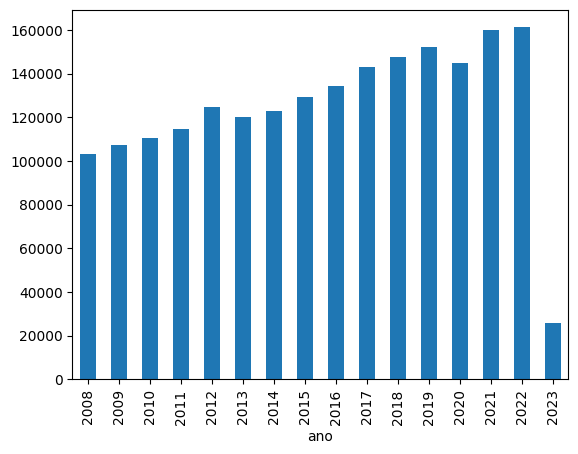

In [ ]:
print(bd.shape[0],' Linhas')
print(bd.shape[1],' Colunas')

bd['nu_competencia'] = bd['nu_competencia'].astype(str)
bd['ano'] = bd['nu_competencia'].str.slice(stop=4)

bd.groupby('ano')['nu_cnspcn'].count().plot(kind='bar')

# Identificar os Procedimentos mais Comuns
No código abaixo, estamos realizando a contagem de procedimentos na base de dados. Em seguida, salvamos os 10 procedimentos mais recorrentes. 

In [ ]:
# Listar 10 procedimentos mais comuns
proc_mais_frequente = bd['co_procedimento'].value_counts(ascending=False)[1:10]
proc_mais_frequente = proc_mais_frequente.index
proc_mais_frequente

Int64Index([206020031, 301010072, 304040096, 206030010, 304010081, 304020222,
            304080071, 206030037, 208050035],
           dtype='int64')

# Criar variáveis Dummies
No passo anterior, identificamos um volume muito alto de procedimento, criar uma dummy para cada um dos procedimentos pode gerar uma matriz grande. Para facilitar, vamos utilizar os 10 procedimentos mais frequentes para criar essas dummies. Se desejar, você pode criar dummies para quantos procedimentos achar viável. 

No código abaixo, estamos utilizando uma função que cria as colunas adicionando d_{coprocedimento} e marcamos como ocorrência ou não de um evento.

In [ ]:
# Criar Dummies com os 10 procedimentos mais comuns
for proc in proc_mais_frequente:
  bd[f'd_{proc}'] = bd['co_procedimento'].apply(lambda x: 1 if x == proc else 0)

In [ ]:
bd.head()

,nu_cnspcn,nu_competencia,nu_idade,co_procedimento,co_cidpri,sg_sexo,co_ibge_municipio_evento,co_ibge_municipio_residencia,qt_aprovada,vl_aprovado,...,ano,d_206020031,d_301010072,d_304040096,d_206030010,d_304010081,d_304020222,d_304080071,d_206030037,d_208050035
0,0.0,200801,48,206010044,C349,F,320530,320530,1,86.75,...,2008,0,0,0,0,0,0,0,0,0
1,0.0,200801,54,206010052,C349,M,421480,421460,1,86.75,...,2008,0,0,0,0,0,0,0,0,0
2,0.0,200801,54,206020031,C349,M,421480,421460,1,136.41,...,2008,1,0,0,0,0,0,0,0,0
3,0.0,200801,4,206020031,C343,M,430300,430300,1,136.41,...,2008,1,0,0,0,0,0,0,0,0
4,0.0,200801,52,206020031,C349,M,510340,510340,1,136.41,...,2008,1,0,0,0,0,0,0,0,0


# Codificar variável SEXO

In [ ]:
# Carregar o sklearn e criar uma label encoder para sexo
from sklearn import preprocessing 
sexo_encoder = preprocessing.LabelEncoder()

In [ ]:
#Transformação da variável sexo
bd['sg_sexo'] = sexo_encoder.fit_transform(bd['sg_sexo'])
bd[['sg_sexo']].head()

,sg_sexo
0,1
1,2
2,2
3,2
4,2


In [ ]:
chave = sexo_encoder.classes_
valor = sexo_encoder.transform(sexo_encoder.classes_)
dicionario = dict(zip(chave, valor))
print(dicionario)

{'0': 0, 'F': 1, 'M': 2}


# Verificar se o procedimento foi realizado no mesmo município de residência

In [ ]:
# Verificar se o município do evento é o mesmo de residência 
bd['mesmo_municipio'] = (bd['co_ibge_municipio_evento'] == bd['co_ibge_municipio_residencia']).astype(int)

In [ ]:
# 1 = sim
# 0 = não
bd['mesmo_municipio'].head()

0    1
1    0
2    0
3    1
4    1
Name: mesmo_municipio, dtype: int64

# Remover colunas que não serão utilizadas

Remover colunas com missing e colunas que não serão utilizadas para a etapa de modelagem

In [ ]:
#Remover coluna apac
bd = bd.drop('nu_apac', axis=1)

#Remover coluna cidpri
bd = bd.drop('co_cidpri', axis=1)

#Drop linhas CNS vazias
bd = bd.dropna(subset = ['nu_cnspcn'])

bd.isnull().sum()

nu_cnspcn                       0
nu_competencia                  0
nu_idade                        0
co_procedimento                 0
sg_sexo                         0
co_ibge_municipio_evento        0
co_ibge_municipio_residencia    0
qt_aprovada                     0
vl_aprovado                     0
co_gestao                       0
co_cnes_estabelecimento         0
pa_condic                       0
no_origem                       0
ano                             0
d_206020031                     0
d_301010072                     0
d_304040096                     0
d_206030010                     0
d_304010081                     0
d_304020222                     0
d_304080071                     0
d_206030037                     0
d_208050035                     0
mesmo_municipio                 0
dtype: int64

In [ ]:
#pd.options.display.max_columns == None
bd = bd[~bd['no_origem'].str.contains('siasus_bi')]

In [ ]:
#### 

In [ ]:
#### Selecionar nucsspcn
#### Ordenar nu_competência
#### Fazer a contagem nu competencia
#### Converter em data
#### Se for maior ou igual a 6, marca 1, 0

In [ ]:
#Drop coluna cidpri
#Remover siasus_bi na coluna 'nu_origem'
#bd[bd['no_origem'].str.contains('siasus_bi')]
#Quantidade de comparecimento
#Criar o target

,nu_cnspcn,nu_competencia,nu_idade,co_procedimento,sg_sexo,co_ibge_municipio_evento,co_ibge_municipio_residencia,qt_aprovada,vl_aprovado,co_gestao,...,d_206020031,d_301010072,d_304040096,d_206030010,d_304010081,d_304020222,d_304080071,d_206030037,d_208050035,mesmo_municipio
0,0.000000e+00,200801,48,206010044,F,320530,320530,1,86.75,320000,...,0,0,0,0,0,0,0,0,0,1
1,0.000000e+00,200801,54,206010052,M,421480,421460,1,86.75,421480,...,0,0,0,0,0,0,0,0,0,0
2,0.000000e+00,200801,54,206020031,M,421480,421460,1,136.41,421480,...,1,0,0,0,0,0,0,0,0,0
3,0.000000e+00,200801,4,206020031,M,430300,430300,1,136.41,430300,...,1,0,0,0,0,0,0,0,0,1
4,0.000000e+00,200801,52,206020031,M,510340,510340,1,136.41,510340,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492607,9.209448e+14,202302,69,206020031,F,355030,355030,1,136.41,350000,...,1,0,0,0,0,0,0,0,0,1
2492608,9.209448e+14,202302,69,206030010,F,355030,355030,1,138.63,350000,...,0,0,0,1,0,0,0,0,0,1
2492609,9.209448e+14,202302,69,206030037,F,355030,355030,1,138.63,350000,...,0,0,0,0,0,0,0,1,0,1
2492610,9.209922e+14,202302,58,206020031,F,355410,355410,1,136.41,350000,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
import pandas as pd

url='https://raw.githubusercontent.com/labxss/curso_python/main/aux/vw_siasus_pa_diretriz_sintese.csv'
onco = pd.read_csv(url, index_col=0, encoding="UTF8")

display(onco)

,no_diretriz,co_cid,dt_inicio,dt_fim,usuários,procedimentos,municipios
nu_diretriz,,,,,,,
2.0,Acne grave,"L700,L701,L708",2008-02-01,2023-02-28,502819,5,4767
3.0,Acromegalia,E220,2008-02-01,2023-02-28,24394,20,2401
4.0,Adenocarcinoma de Próstata,"C61 ,D75 ,",2008-02-01,2023-02-28,469421,62,5540
5.0,Anemia Hemolítica Autoimune,"D590,D591,D460,D461,D467,D600,D608,D610,D611,D...",2008-02-01,2023-02-28,40501,56,3028
6.0,Anemia por Deficiência de Ferro,"D500,D508",2008-03-01,2015-06-30,9757,4,858
...,...,...,...,...,...,...,...
122.0,Transtorno Esquizoafetivo,"F250,F251,F252",2014-12-01,2023-02-28,33099,13,2943
123.0,Tromboembolismo Venoso em Gestantes com Trombof.,"D688,I820,I821,I822,I823,I828,O223,O225",2020-04-01,2023-02-28,26695,2,2854
124.0,Tumor Cerebral - Adultos,"C710,C711,C712,C713,C714,C715,C716,C717,C718,C719",2008-02-01,2023-02-28,43009,27,4396


## SIGTAP - Sistema de Gerenciamento da Tabela de Procedimentos, Medicamentos e OPM do SUS

A SIGTAP, também apelidada de *tabela do SUS*, mantém o regramento de acesso a grande parte das terapias oferecidas pelo SUS. A seguir é possível observar no navegador http://sigtap.datasus.gov.br/ a taxonomia:

- procedimento: composto por dez dígitos, por exemplo 03.04.04.010-0
- Grupo: dois primeiros dígitos.
- Subgrupo: terceiro e quarto dígitos.
- Forma de Organização: Quinto e sexto dígito.
- Os três próximos dígitos são números sequenciais dentro da Forma de Organização;
- O último dígito é um dígito verificador. 

<blockquote>
<b>Informação:</b>

Evidentemente, os criadores da codificação Sigtap não se preocuparam com otimização computacional ao iniciar com um zero à esquerda. Logo, em bancos de dados normalizados, isto é, com gestão unívoca e estruturada em Sistemas de Gerenciamento de Bancos de Dados (SGBD), o código é armazenado como tipo numérico.
</blockquote>

Veja exemplos de cada nivel a seguir:

1. Grupo
 - 01	Ações de promoção e prevenção em saúde
 - 02	Procedimentos com finalidade diagnóstica
 - 03	Procedimentos clínicos
 - 04	Procedimentos cirúrgicos
 - 05	Transplantes de orgãos, tecidos e células
 - 06	Medicamentos
 - 07	Órteses, próteses e materiais especiais
 - 08	Ações complementares da atenção à saúde
2. Subgrupo
    - 0101	Ações coletivas/individuais em saúde                                                                
    - 0201	Coleta de material                                                                                  
    - 0202	Diagnóstico em laboratório clínico                                                                  
    - 0203	Diagnóstico por anatomia patológica e citopatologia                                                 
    - 0214	Diagnóstico por teste rápido                                                                        
    - 0301	Consultas / Atendimentos / Acompanhamentos                                                          
    - 0302	Fisioterapia                                                                                        
    - 0303	Tratamentos clínicos (outras especialidades)                                                        
    - 0304	Tratamento em oncologia                                                                             
    - 0412	Cirurgia torácica                                                                                   
    - 0413	Cirurgia reparadora                                                                                 
    - 0414	Cirurgia oro-facial                                                                                 
    - 0415	Outras cirurgias                                                                                    
    - 0417	Anestesiologia                                                                                      
    - 0418	Cirurgia em nefrologia                                                                              
    - 0501	Coleta e exames para fins de doação de orgãos, tecidos e células e de transplante                   
    - 0503	Ações relacionadas à doação de orgãos e tecidos para transplante                                    
    - 0504	Processamento de tecidos para transplante                                                           
    - 0506	Acompanhamento e intercorrências pós-transplante                                                    
    - 0601	Medicamentos de dispensação excepcional                                                             
    - 0604	Componente Especializado da Assitencia Farmaceutica                                                 
    - 0701	Órteses, próteses e materiais especiais não relacionados ao ato cirúrgico                           
    - 0702	Órteses, próteses e materiais especiais relacionados ao ato cirúrgico                               
    - 0803	Autorização / Regulação                                                                             
3. Forma de Organização
    - 010105	Praticas Integrativas/Complementares
    - 020210	Exames de genética                                                                        
    - 030401	Radioterapia                                                                                        
    - 030402	Quimioterapia paliativa - adulto                                                                    
    - 030403	Quimioterapia para controle temporário de doença - adulto                                           
    - 030404	Quimioterapia prévia (neoadjuvante/citorredutora)- adulto                                           
    - 030405	Quimioterapia adjuvante (profilática) - adulto                                                      
    - 030406	Quimioterapia curativa - adulto                                                                     
    - 030407	Quimioterapia de tumores de crianca e adolescente                                                   
    - 030408	Quimioterapia - procedimentos especiais
    - 060108	Antiinflamatórios
    - 070212	OPM para transplantes
    - 080301	Deslocamento/Ajuda de custo         
4. Procedimento
    - 0204040035	radiografia de articulacao escapulo-umeral
    - 0204040116	radiografia de escapula/ombro (tres posicoes)
    - 0208070010	cintilografia de pulmao c/ galio 67
    - 0208070028	cintilografia de pulmão p/ pesquisa de aspiração
    - 0208070036	cintilografia de pulmao por inalacao (minimo 2 projecoes)
    - 0208070044	cintilografia de pulmao por perfusao (minimo 4 projecoes)
    - 0211080055	espirometria ou prova de funcao pulmonar completa com broncodilatador
    - 0211080063	prova de função pulmonar simples
    - 0303020016	pulsoterapia I (por aplicacao)
    - 0304010383	radioterapia de traqueia, brônquio, pulmão, pleura e mediastino
    - 0304020214	quimioterapia do carcinoma pulmonar de células não pequenas avançado
    - 0304020222	quimioterapia do carcinoma pulmonar indiferenciado de células pequenas avançado
    - 0304040096	quimioterapia do carcinoma pulmonar de células não pequenas (prévia)
    - 0304040100	quimioterapia do carcinoma pulmonar indiferenciado de células pequenas (prévia)
    - 0304050172	quimioterapia do carcinoma pulmonar de células não pequenas (adjuvante)
    - 0304050180	quimioterapia de carcinoma pulmonar indiferenciado de células pequenas (adjuvante)
                       




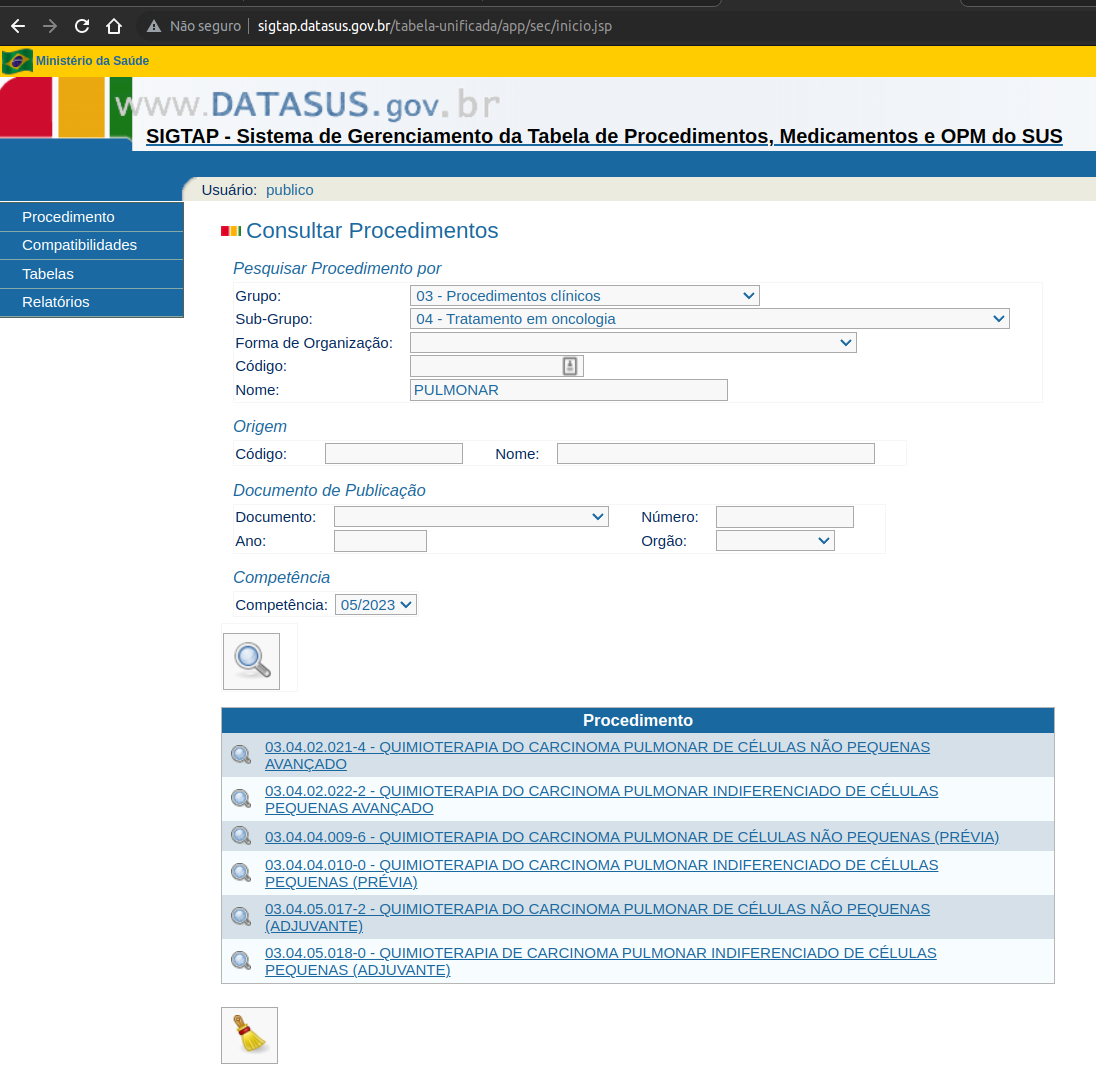

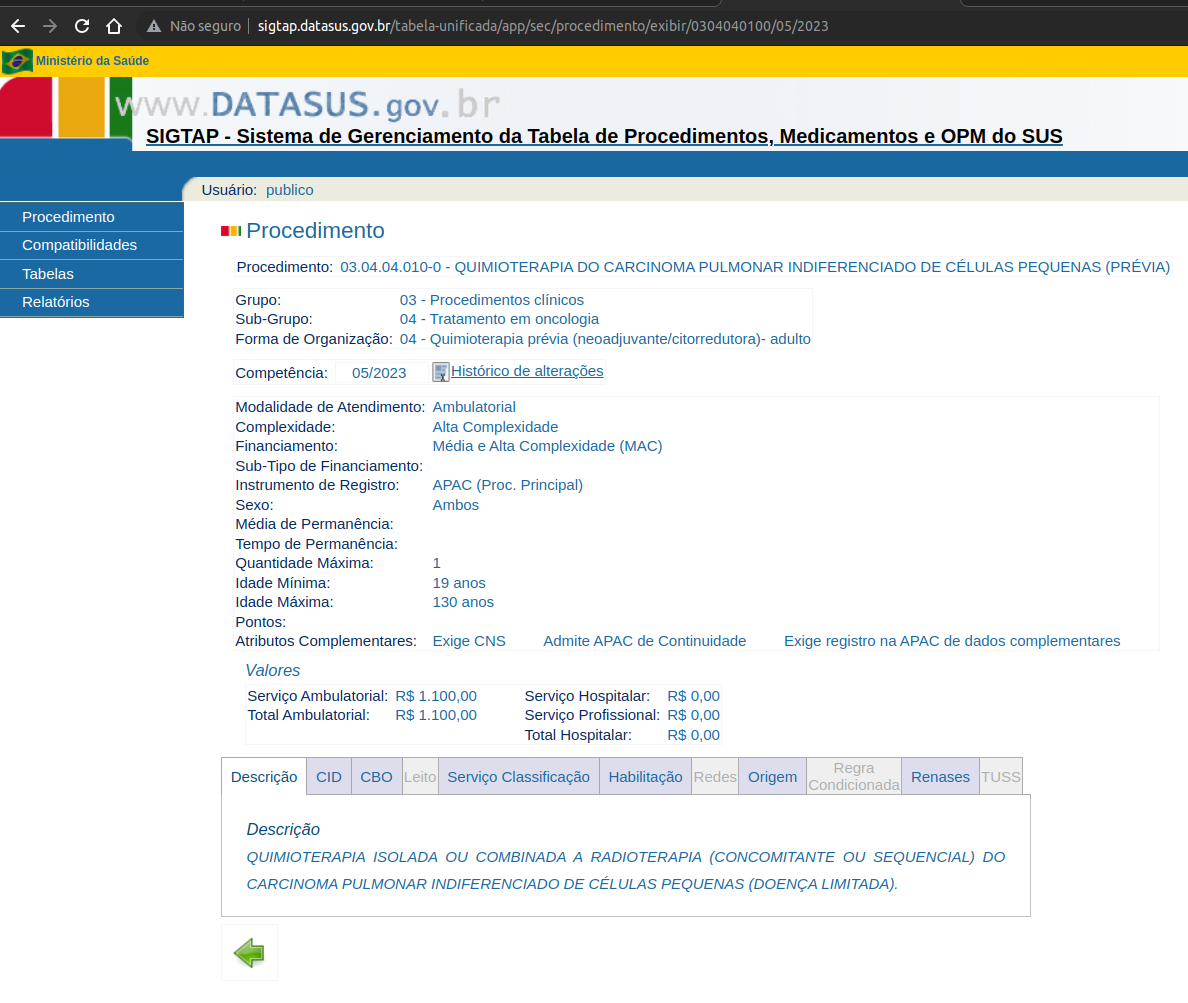



Observe a ficha do procedimento a seguir:


---
Procedimento:	**03.04.04.010-0 - QUIMIOTERAPIA DO CARCINOMA PULMONAR INDIFERENCIADO DE CÉLULAS PEQUENAS (PRÉVIA)**

- Grupo:	03 - Procedimentos clínicos
- Sub-Grupo:	04 - Tratamento em oncologia
- Forma de Organização:	04 - Quimioterapia prévia (neoadjuvante/citorredutora)- adulto
- Competência:	*05/2023*		
- Histórico de alterações
    - 01/2008 - Incluido PORTARIA nº 7 de 09/01/08 SAS
    - 01/2008 - Alterado PORTARIA (REPUBLICAÇÃO) nº 7 de 19/03/08 SAS
    - 04/2008 - Alterado PORTARIA nº 257 de 30/04/08 SAS
    - 07/2008 - Alterado PORTARIA nº 346 de 25/06/08 SAS
    - 08/2009 - Alterado PORTARIA nº 0257 de 28/07/09 SAS
    - 09/2010 - Alterado PORTARIA nº 420 de 25/08/10 SAS
    - 11/2010 - Alterado PORTARIA nº 621 de 12/11/10 SAS
    - 07/2011 - Alterado PORTARIA nº 287 de 17/06/11 SAS
    - 08/2011 - Alterado PORTARIA nº 335 de 14/07/11 SAS
    - 02/2012 - Alterado PORTARIA nº 102 de 03/02/12 SAS
    - 08/2013 - Alterado OUTRO nº 2604 de 05/08/13 DATASUS-RJ
    - 02/2014 - Alterado INFORME CGSI nº 02/2014 de 23/01/14 CGSI
- Modalidade de Atendimento:	Ambulatorial
- Complexidade:	Alta Complexidade
- Financiamento:	Média e Alta Complexidade (MAC)
- Instrumento de Registro:	APAC (Proc. Principal)
- Sexo:	Ambos
- Idade Mínima:	19 anos
- Idade Máxima:	130 anos
- Atributos Complementares:	
    - Exige CNS
    - Admite APAC de Continuidade
    - Exige registro na APAC de dados complementares
- Valores
    - Serviço Ambulatorial:	R$ 1.100,00	
    - Serviço Hospitalar:	R$ 0,00
    - Total Ambulatorial:	R$ 1.100,00	
    - Serviço Profissional:	R$ 0,00
    - Total Hospitalar:	R$ 0,00
- CID10
    - C340	Neoplasia maligna do brônquio principal
    - C341	Neoplasia maligna do lobo superior, brônquio ou pulmão
    - C342	Neoplasia maligna do lobo médio, brônquio ou pulmão
    - C343	Neoplasia maligna do lobo inferior, brônquio ou pulmão
    - C348	Neoplasia maligna dos brônquios e dos pulmões com lesão invasiva
    - C349	Neoplasia maligna dos brônquios ou pulmões, não especificado    
- CBO
    - 225121	Médico oncologista clínico
- Serviço classificação    
    - 132	003	Oncologia clínica
(Serviço de Oncologia)
- Habilitação
    - 1712	CACON
    - 1713	CACON com serviço de oncologia pediátrica
    - 1706	UNACON
    - 1708	UNACON com serviço de hematologia
    - 1709	UNACON com serviço de oncologia pediátrica
    - 1707	UNACON com serviço de radioterapia
    - 1716	Serviço de Oncologia Clínica de Complexo hospitalar
- [Renases](https://bvsms.saude.gov.br/bvs/publicacoes/relacao_nacional_acoes_saude.pdf)
    - 122	Tratamento Oncológico: Quimioterapia Prévia Neoadjuvante ou Citorredutora em Adultos    
---



Veja mais informações na [wiki](https://wiki.saude.gov.br/sigtap/index.php/P%C3%A1gina_principal) do Ministério da Saúde.



## Clasificação Internacional de Doenças

A Classificação Estatística Internacional de Doenças e Problemas Relacionados com a Saúde (CID, em inglês: *International Statistical Classification of Diseases and Related Health Problems*, ICD) foi publicada pela Organização Mundial de Saúde (OMS) em 1992.

O código da CID10 é adotado nos sistemas de atenção à saúve e vigilância disseminados pelo SUS. Entretanto, ainda que oriundo do mesmo sistema e com a mesma semântica, pode haver divergência de nomenclatura:

- CIH: diag_princ, diag_secun
- CIHA: diag_princ, diag_secun
- CMD: co_diagp
- SIA: ap_cidcas, ap_cidpri, ap_cidsec, aq_cid10, aq_cidini1, aq_cidini2, aq_cidini3, ar_cid10, ar_cidini1, ar_cidini2, ar_cidini3, ar_cidtr1, ar_cidtr2, ar_cidtr3, cidassoc, cidpri, pa_cidcas, pa_cidpri, pa_cidsec
- SIH: cid_asso, cid_morte, cid_notif, diag_princ, diag_sec, diagsec1, diagsec2, diagsec3, diagsec4, diagsec5, diagsec6, diagsec7, diagsec8, diagsec9, diag_secun, sp_cidpri, sp_cidsec
- SIM: causabas, causabas_o, causamat, linhaa, linhaa_o, linhab, linhab_o, linhac, linhac_o, linhad, linhad_o, linhaii, linhaii_o
- SINAN: id_agravo, diag_esp

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/labxss/curso_python/main/aux/tf_cid10_capitulo.csv"
cap = pd.read_csv(url, index_col=0, encoding="UTF8")
display(cap)

,codigos,titulo
capitulo,,
I,A00-B99,Algumas doenças infecciosas e parasitárias.
II,C00-D48,Neoplasmas (tumores).
III,D50-D89,Doenças do sangue e dos órgãos hematopoéticos ...
IV,E00-E90,Doenças endócrinas; nutricionais e metabólicas.
V,F00-F99,Transtornos mentais e comportamentais.
VI,G00-G99,Doenças do sistema nervoso.
VII,H00-H59,Doenças do olho e anexos.
VIII,H60-H95,Doenças do ouvido e da apófise mastoide.
IX,I00-I99,Doenças do aparelho circulatório.


<blockquote>
<hr>
<b>Exercício:</b> 

Caracterize os atendimentos relacionados a <b>câncer do pulmão</b> aos usuários do SUS a partir da tabela <b>vw_siasus_pa_024_usuario_sintese.csv</b>. Quantos procedimento são realizados em média? Quantos usuários são atendidos ao ano? Idetifique quais diretrizes, além de câncer do pulmão, apresentam atendimentos para os usuários desta coorte (veja a variável <i>co_seq_diretriz_total</i>). Caracterize a distribuição segundo a região do país conforme município de residência. Quantas pessoas são atendidas fora do estado de residência?

<b>Dica</b>: Use as tabelas de domínio disponíveis no <a href="https://github.com/labxss/curso_python/tree/main/aux">github</a>: 
<ul>
  <li><b>co_mes_min e co_mes_max</b> - td_tempo_ano_mes.csv</li>
  <li><b>co_seq_procedimento</b> - td_sigtap.csv</li>
  <li><b>co_seq_gestao e co_seq_municipio_residencia</b> - td_territorio.csv</li>
  <li><b>co_seq_diretriz</b> - td_diretriz_cnv.csv</li>
  <li><b>co_seq_cidpri</b> - td_doenca_cid10.csv</li>
</ul>

<hr>
</blockquote>	


# Modelagem para predição do desfecho de tratamentos oncológicos

A modelagem dos dados é o objetivo do dia de hoje, a qual será feita com base nos conhecimentos da sistemática dos arquivos de disseminação do SIA.

Acesse o [github](https://github.com/labxss/curso_python/) e familiarize-se com o dicionário de dados das tabelas de síntese acessando *dicionario__vw_siasus_pa_usuario_sintese.csv*.

In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/labxss/curso_python/main/aux/dicionario__vw_siasus_pa_usuario_sintese.csv"
cap = pd.read_csv(url, index_col=0, encoding="UTF8")
display(cap)

,descrição
Variável,
usuariosus,Cartão Nacional de Saúde criptografado
qt_registro,Registros para a doença selecionada
sexo_f,Registros para a doença selecionada assinalado...
idade_min,idade mínima referente ao primeiro registro da...
idade_max,idade mínima referente ao primeiro registro da...
co_mes_min,código sequencial de mês referete ao primeiro ...
co_mes_max,código sequencial de mês referete ao primeiro ...
co_seq_diretriz,código sequencial da diretriz da doença seleci...
co_seq_cidpri,código sequencial do diagnóstico primário da d...



<blockquote>
<hr>
<b>Exercício:</b> 

Escolha o grupo de arquivos de câncer do pulmão, organíze-os e transforme conforme o modelo preditivo que escolher.

<b>Dica</b>: Os arquivos dos <b>item 1</b> e <b>item 2</b>, descritos acima, estão com códigos originais de procedimentos e diagnósticos. Enriqueça as variáveis a partir das tabelas de domínio disponíveis no <a href="https://github.com/labxss/curso_python/tree/main/aux">github</a>.

<b>Dica</b>: Os arquivos do <b>item 3</b>, descrito acima, estão com identificadores sequenciais. Enriqueça as variáveis a partir das tabelas de domínio disponíveis no <a href="https://github.com/labxss/curso_python/tree/main/aux">github</a>: 
<ul>
  <li><b>co_mes_min e co_mes_max</b> - td_tempo_ano_mes.csv</li>
  <li><b>co_seq_procedimento</b> - td_sigtap.csv</li>
  <li><b>co_seq_gestao e co_seq_municipio_residencia</b> - td_territorio.csv</li>
  <li><b>co_seq_diretriz</b> - td_diretriz_cnv.csv</li>
  <li><b>co_seq_cidpri</b> - td_doenca_cid10.csv</li>
</ul>

<hr>
</blockquote>	




In [ ]:
import urllib.request
import gzip
import pandas as pd

# Define o URL do arquivo GZ
url_gz = 'https://github.com/labxss/curso_python/raw/main/data/vw_siasus_pa_024_usuario_sintese.csv.gz'

# Define o nome do arquivo CSV
arquivo_csv = 'tf_cancer_pulmao.2021.csv'

# Baixa o arquivo GZ do URL e extrai o arquivo CSV
with urllib.request.urlopen(url_gz) as f:
    with gzip.open(f) as gz:
        with open(arquivo_csv, 'wb') as csv:
            csv.write(gz.read())

# Lê o arquivo CSV em um dataframe
df = pd.read_csv(arquivo_csv)




In [ ]:
# juntando o mes de inicio com a tabela de tempo
url="https://raw.githubusercontent.com/labxss/curso_python/main/aux/td_tempo_ano_mes.csv"
mes = pd.read_csv(url)[['co_seq_mes_ano','ano']]
mes=mes.rename(columns={'co_seq_mes_ano': 'co_mes_min'})
df = pd.merge(df, mes, how='left', indicator = True)

In [ ]:
df1 = df
df2=df['co_seq_diretriz_total'].str.split(',', expand=True)
x=pd.concat([df1, df2], axis=1)
display(x)

,usuariosus,qt_registro,sexo_f,idade_min,idade_max,co_mes_min,co_mes_max,co_seq_diretriz,co_seq_cidpri,co_seq_procedimento,...,0,1,2,3,4,5,6,7,8,9
0,100099100006203,1,0,72,72,1482,1482,24,1082,1779,...,24,None,None,None,None,None,None,None,None,None
1,102081600002480,7,0,66,67,1315,1321,24,1087,1778,...,24,None,None,None,None,None,None,None,None,None
2,102202400003963,14,0,66,66,1353,1363,24,"1086, 1087","1706, 1716, 1726, 1778",...,24,None,None,None,None,None,None,None,None,None
3,102230600023112,5,0,77,77,1388,1392,24,1087,1836,...,24,47,None,None,None,None,None,None,None,None
4,102254200009263,8,0,47,47,1309,1312,24,1087,"1778, 1919",...,24,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137649,920980255650021,6,0,62,62,1367,1372,24,1086,1778,...,24,None,None,None,None,None,None,None,None,None
137650,920982650050009,6,6,64,64,1348,1353,24,1082,1778,...,24,None,None,None,None,None,None,None,None,None
137651,920984324240004,3,3,68,68,1353,1353,24,1087,"1706, 1707, 1716",...,24,None,None,None,None,None,None,None,None,None
137652,920990415660000,4,0,59,59,1307,1311,24,1087,1778,...,24,None,None,None,None,None,None,None,None,None


In [ ]:
# Exibe o dataframe
df.head()


,usuariosus,qt_registro,sexo_f,idade_min,idade_max,co_mes_min,co_mes_max,co_seq_diretriz,co_seq_cidpri,co_seq_procedimento,...,0,1,2,3,4,5,6,7,8,9
0,100099100006203,1,0,72,72,1482,1482,24,1082,1779,...,24,None,None,None,None,None,None,None,None,None
1,102081600002480,7,0,66,67,1315,1321,24,1087,1778,...,24,None,None,None,None,None,None,None,None,None
2,102202400003963,14,0,66,66,1353,1363,24,"1086, 1087","1706, 1716, 1726, 1778",...,24,None,None,None,None,None,None,None,None,None
3,102230600023112,5,0,77,77,1388,1392,24,1087,1836,...,24,47,None,None,None,None,None,None,None,None
4,102254200009263,8,0,47,47,1309,1312,24,1087,"1778, 1919",...,24,None,None,None,None,None,None,None,None,None




<blockquote>
<hr>
<b>Exercício:</b> 

Reduza a dimensionalidade do arquivo derivado de  <b>vw_siasus_pa_024_usuario_sintese.csv</b> conforme o modelo preditivo escolhido.

<hr>
</blockquote>	


# Predição de desfecho de tratamentos oncológicos - modelo final

Execute modelos preditivos para identificar se um novo usuário do SUS retornará ao Sistema de Informação Ambulatorial após 6 meses de interrupção do tratamento.

Use a tabela https://raw.githubusercontent.com/labxss/curso_python/main/data/dm_cancer_pulmao.csv se preferir.

Descrição das variáveis:

- qt_registro: número de registros
- sexo_f: número de registros do sexo feminino
- idade_min: idade no primeiro registro
- anos: diferença, em anos, da idade entre último registro e o primeiro registro
- meses: meses de tratamento (diferença entre o último mês de tratamento e o primeiro)
- cid1081, cid1082, cid1083, cid1084 (...) diagnóstico primário segundo a variável *co_seq* da *tabela td_doenca_cid10.csv*
- pro1706, pro1707, pro1711, pro1713 (...) procedimento segundo a variável *co_seq_procedimento* da tabela *td_sigtap.csv*
- gestao_plena: informa se o município de atendimento é de gestão plena
- regiao: informa região do país, 1=N, 2=NE, 3=SE, 4=S, 5=CO
- intervalo6meses: informa se houve tratamento após 6 meses de intervalo


In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/labxss/curso_python/main/data/dm_cancer_pulmao.csv')
display(df)

,qt_registro,sexo_f,idade_min,anos,meses,cid1081,cid1082,cid1083,cid1084,cid1085,...,pro1901,pro1902,pro1906,pro1907,pro1913,pro1917,pro1919,gestao_plena,regiao,intervalo6meses
0,1,0,72,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0
1,7,0,66,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0
2,14,0,66,0,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,0
3,5,0,77,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0
4,8,0,47,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137649,6,0,62,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.0,0
137650,6,6,64,0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
137651,3,3,68,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3.0,0
137652,4,0,59,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2.0,0


# Referências
